# https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes.csv"

# Load the latest version
dataset = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "akshaydattatraykhare/diabetes-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", dataset.head())

/tmp/ipython-input-4-1961047913.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  dataset = kagglehub.load_dataset(


First 5 records:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [9]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
dataset['Glucose'].value_counts()

,count
Glucose,
99,17
100,17
111,14
125,14
129,14
...,...
56,1
169,1
149,1


In [11]:
dataset['Insulin'].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
178,1
127,1
510,1


In [12]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[cols_with_zeros] = dataset[cols_with_zeros].replace(0,dataset[cols_with_zeros].median() )

In [13]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [16]:
x=dataset.drop(['Outcome'],axis=1)
y=dataset['Outcome']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)


from sklearn.metrics import accuracy_score,classification_report
acc_train=accuracy_score(y_train,y_pred_train)
acc_test=accuracy_score(y_test,y_pred_test)
print("accuracy of training: ", acc_train)
print("accuracy of testing: ", acc_test)

accuracy of training:  0.8501628664495114
accuracy of testing:  0.7272727272727273


In [20]:
classification_report_data=classification_report(y_test,y_pred_test)
print(classification_report_data)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [21]:
k=20
error=[]
accuracy=[]
for i in range(1,k+1):
 knn=KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 y_pred=knn.predict(x_test)
 accuracy.append(accuracy_score(y_test, y_pred))
 error.append(1-accuracy_score(y_test, y_pred))

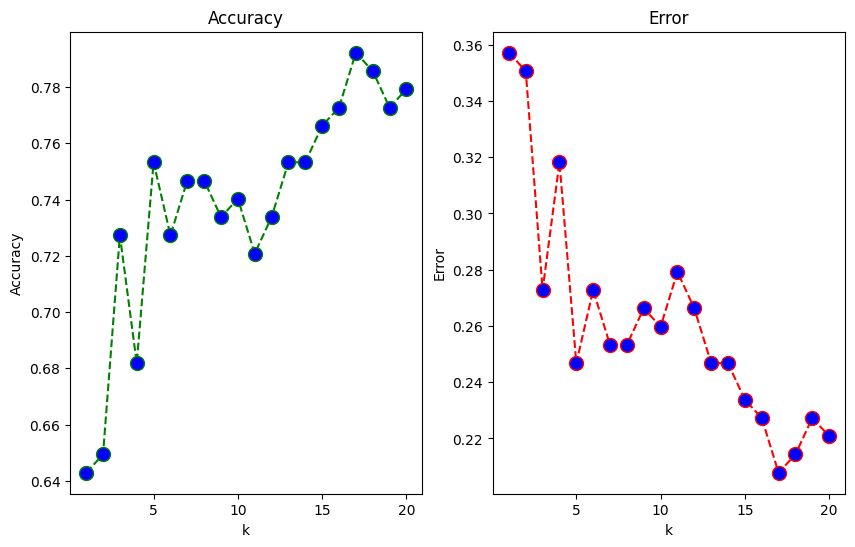

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(range(1, k+1, 1), accuracy, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')


plt.subplot(1,2,2)
plt.plot(range(1, k+1, 1), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error')
plt.xlabel('k')
plt.ylabel('Error')

plt.show()#accuracy is fixed

In [23]:
knn2 = KNeighborsClassifier(n_neighbors=17)
knn2.fit(x_train, y_train)

y_pred_train2 = knn2.predict(x_train)
y_pred_test2 = knn2.predict(x_test)



accuracy_train2 = accuracy_score(y_train, y_pred_train2)
accuracy2 = accuracy_score(y_test, y_pred_test2)

print("accuracy of training: ", accuracy_train2)
print("accuracy of testing: ", accuracy2)



accuracy of training:  0.8110749185667753
accuracy of testing:  0.7922077922077922
